In [24]:
import assignment1 as a1
import utilities as utl
import scipy
import numpy as np
import matplotlib.pyplot as plt

from utilities import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
(countries, features, values) = a1.load_unicef_data()

targets = values[:,1]
x = values[:,7:]
x = a1.normalize_data(x)

N_TRAIN = 100
x_train = x[0:N_TRAIN, :]
t_train = targets[0:N_TRAIN]
x_test = x[N_TRAIN:, :]
t_test = targets[N_TRAIN:]

u = (100, 10000)
s = 2000.0
r = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)

In [36]:
err_test_count = []
err_train_count = []
for temp_lambda in r:

    sta_pos = [it * 10 for it in range(10)]
    end_pos = [it * 10 for it in range(11)][1:]

    err_test_collection = np.array([0] * 10)
    err_train_collection = np.array([0] * 10)

    for idx in xrange(10):
        s1 = sta_pos[idx % 10]
        e1 = end_pos[idx % 10]
        s2 = sta_pos[(idx+1) % 10]
        e2 = end_pos[(idx+1) % 10]
        # print s1, e1, s2, e2
        new_x_train = x_train[s1:e1]
        new_t_train = t_train[s1:e1]
        new_x_test = x_test[s2:e2]
        new_t_test = t_test[s2:e2]
        # with regularization
        w, err_train, err_test = polynomial_regression_with_regularization( \
                            temp_lambda, new_x_train, new_t_train, new_x_test, new_t_test, degree=3)

        err_test_collection[idx] = err_test
        err_train_collection[idx] = err_train

    err_test_count.append(np.average(err_test_collection))
    err_train_count.append(np.average(err_train_collection))

    print np.mean(err_train_collection), np.mean(err_test_collection)

0.0 49.2
0.0 49.2
0.0 49.2
0.0 49.2
0.0 48.5
1.3 46.5
7.3 43.3
22.6 41.2
41.7 47.5


In [37]:
r

(0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)

In [38]:
err_test_count

[49.200000000000003,
 49.200000000000003,
 49.200000000000003,
 49.200000000000003,
 48.5,
 46.5,
 43.299999999999997,
 41.200000000000003,
 47.5]

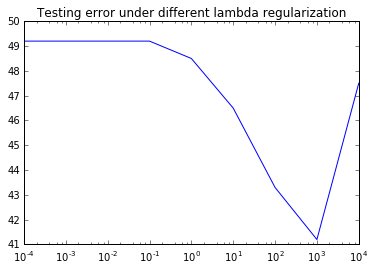

In [39]:
plt.semilogx(r, err_test_count)
plt.title('Testing error under different lambda regularization')
plt.show()